In [1]:
import os
from os.path import exists

import anchor
# import anchor.anchor_tabular

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score
import time

from AnchorGeneration import *
from UtilsModel import *

In [2]:
data_path = "simulationVictorTopological/"
res_path = data_path+"resultsPSR_Safe/"
if not exists(res_path):
    os.mkdir(res_path)
results_anchorfile = "anchors-csr.csv"
feature_labels = ['meanEntropy', 'medianEntropy',
       'stdsEntropy', 'iqrsEntropy']
true_output = "y_true"
#model_output = "y_pred"
cp_output = "y_conformal"
modelfilename = "CP_SVM_safe.sav" 

In [3]:
train = pd.read_csv(data_path+"train_cp.csv")
y_train = np.array(train[true_output])
#y_model_train = np.array(train[model_output])
y_cp_train = np.array(train[cp_output])
X_train = train.drop([true_output,cp_output],axis = 1)
X_train = np.array(X_train)

test = pd.read_csv(data_path+"test_cp.csv")
y_test = np.array(test[true_output])
#y_model_test = np.array(test[model_output])
y_cp_test = np.array(test[cp_output])
X_test = test.drop([true_output,cp_output],axis = 1)
X_test = np.array(X_test)

In [4]:
train.columns

Index(['meanEntropy', 'medianEntropy', 'stdsEntropy', 'iqrsEntropy', 'y_true',
       'y_conformal'],
      dtype='object')

# Anchors from Conformal SVM

In [5]:
sc_svm = joblib.load(data_path+modelfilename)

In [6]:
sc_svm.get_params()

{'alpha': array([4.99955410e-01, 5.00036436e-01, 4.99884052e-01, ...,
        4.99870439e-01, 6.92332551e-05, 4.99887713e-01]),
 'b': array([-0.15650505]),
 'b_eps': 0.16890016282061415,
 'eta': 0.3,
 'kernel': 'gaussian',
 'param': 0.5,
 'tau': array([[0.5]]),
 'solver': 'osqp'}

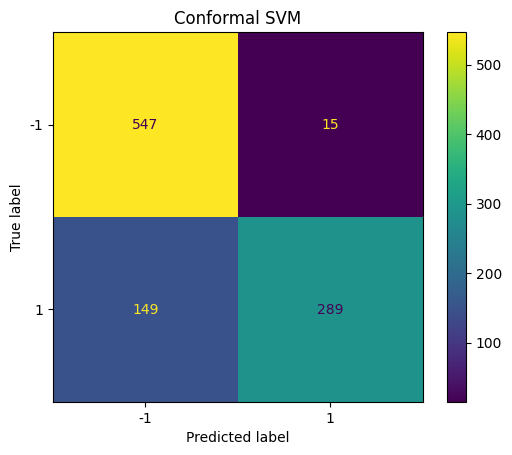

ACC = 0.836, F1 = 0.7789757412398922, PPV = 0.9506578947368421, NPV = 0.7859195402298851, TPR = 0.6598173515981736, TNR = 0.9733096085409253

TP = 289, FP = 15, TN = 547, FN = 149


In [7]:
EvaluateModel(sc_svm, X_test, y_test, "Conformal SVM")

Lo siguiente tarda unos 5500 segundos para las 7 variables, es decir unos 91 minutos. Si es solo para las 4 caracteristicas topologicas unos  60 minutos


In [8]:
anchors_ssvm = GenerateAnchorRules(sc_svm, X_train, X_test, y_cp_test, y_test, [i[0] for i in list(enumerate(X_test))], feature_labels, list(sc_svm.classes_), precision_threshold = 0.5, filepath = res_path+results_anchorfile)

Elapsed time [sec] - Anchors for 1000 test points: 1935.9607870578766
